# Objective

A work colleague tells you they just finished training a new model to predict home prices and would like a second set of eyes on their model’s predictions.  Your job is to analyze the dataset of home price predictions their model made (column titled Prediction) against the actual prices these homes sold for (SaleDollarCnt) and look to evaluate how their model performs.  You also have all the features they used to build their prediction model, so they would appreciate if you would look for patterns in where their model is performing accurately versus not.

## Data Explanation

Data: home sale transactions from 2015 in King County, WA

Description of fields:
* PropertyID: Unique ID for home 
* TransDate: Date of current sale 
* SaleDollarCnt: Price of current sale 
* BathroomCnt: Number of bathrooms in home 
* BedroomCnt: Number of bedrooms in home
* BuiltYear: Year home was constructed 
* FinishedSquarefeet: Finished square footage of the home 
* GarageSquareFeet: Size of protected garage space if any
* LotsizeSquarefeet: Lot size of property in square feet 
* StoryCnt: Number of stories for the home 
* latitude: Latitude of the home * 1,000,000 
* longitude: Longitude of the home * 1,000,000 
* Usecode: Type of home (all homes in both training and test are single-family homes) 
* ZoneCodeCounty: The intensity of use or density the lot is legally allowed to be built-up to
* viewtypeid: Nominal variable indicating the type of view from the home (blank or NULL value indicates no view)
* censusblockgroup: The FIPS code for the census block group this property is located in.  You can derive the * * census tract FIPS by truncating the rightmost digit.
* BGMedHomeValue: The median home value in the block group      
* BGMedRent:  The median rent value in the block group           
* BGMedYearBuilt:  The median year structures in the block group were built
* BGPctOwn:  Percentage of homes that are owner-occupied in the block group
* BGPctVacant:  Percentage of housing that is vacant in the block group         
* BGMedIncome:  Median income of households residing in the block group         
* BGPctKids:  Percentage of households with children under 18 years present at home          
* BGMedAge:  Median age of residents of the block group
* Prediction: Your Colleague’s model’s prediction of value


## Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../../Data/Zillow_OA.csv')
data.head(10)

,PropertyID,SaleDollarCnt,TransDate,censusblockgroup,ZoneCodeCounty,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,...,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,Prediction
0,48649479,315000,9/26/2015,530330299023,R5,9,3.0,3.00,3020.0,NaN,...,-122254904,354400.0,1186.0,1985.0,0.8754,0.0796,101071,0.3446,40.3,3.780083e+05
1,48649878,219950,4/21/2015,530330306001,R7,9,3.0,2.00,1070.0,520.0,...,-122208799,250600.0,933.0,1956.0,0.6612,0.0000,46826,0.2564,39.7,NaN
2,48650240,1038000,4/1/2015,530330245002,R8.4,9,5.0,2.75,3050.0,420.0,...,-122214353,621000.0,2001.0,1960.0,0.7631,0.0445,139375,0.3592,45.9,9.918111e+05
3,48650786,330000,7/7/2015,530330282003,LDR,9,3.0,2.00,2290.0,540.0,...,-122283929,313300.0,794.0,1980.0,0.2203,0.1006,31731,0.2864,33.4,5.495120e+05
4,48651419,785000,9/29/2015,530330106001,SF 5000,9,5.0,3.00,3200.0,NaN,...,-122380792,448700.0,681.0,1947.0,0.8085,0.0591,135729,0.3582,38.5,1.015979e+06
5,48651585,385000,8/29/2015,530330275002,RS7200,9,3.0,2.00,2260.0,460.0,...,-122337214,236400.0,807.0,1950.0,0.8329,0.0188,61067,0.1370,52.5,4.337702e+05
6,48652439,273500,9/26/2015,530330303082,RS7.2,9,3.0,2.00,1550.0,460.0,...,-122354468,264700.0,780.0,1985.0,0.6082,0.0988,72857,0.5292,31.2,2.857266e+05
7,48654551,305000,7/30/2015,530330266001,R6,9,3.0,1.00,1300.0,NaN,...,-122360126,258300.0,1095.0,1953.0,0.3978,0.0312,53024,0.3763,36.9,NaN
8,48655314,719950,7/18/2015,530330202003,R6,9,3.0,1.00,1590.0,NaN,...,-122375899,394300.0,916.0,1967.0,0.6766,0.1061,81813,0.2047,55.8,6.032833e+05
9,48655478,699950,6/18/2015,530330202005,R6,9,5.0,3.75,3380.0,490.0,...,-122367465,387800.0,1262.0,1968.0,0.6629,0.0628,91336,0.4442,36.3,9.850608e+05


## Data Process

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11588 entries, 0 to 11587
Data columns (total 25 columns):
PropertyID            11588 non-null int64
SaleDollarCnt         11588 non-null int64
TransDate             11588 non-null object
censusblockgroup      11588 non-null int64
ZoneCodeCounty        11588 non-null object
Usecode               11588 non-null int64
BedroomCnt            11588 non-null float64
BathroomCnt           11588 non-null float64
FinishedSquareFeet    11588 non-null float64
GarageSquareFeet      8747 non-null float64
LotSizeSquareFeet     11588 non-null int64
StoryCnt              11588 non-null float64
BuiltYear             11588 non-null float64
ViewType              2632 non-null float64
Latitude              11588 non-null int64
Longitude             11588 non-null int64
BGMedHomeValue        11582 non-null float64
BGMedRent             8957 non-null float64
BGMedYearBuilt        11341 non-null float64
BGPctOwn              11588 non-null float64
BGPctVacan

* Current sale price is integer, but Prediction is floating number, should be rounded?
* Prediction has 2784 Null value
* Most ViewType data are Null
* Garage size, built-year, Median Rent has a few Null value

In [65]:
prediction = data[data.Prediction.notna()]
non_prediction = data[data.Prediction.isna()]

In [66]:
prediction.describe()

,PropertyID,SaleDollarCnt,censusblockgroup,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,...,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,Prediction
count,8.804000e+03,8.804000e+03,8.804000e+03,8804.0,8804.000000,8804.000000,8804.000000,7284.000000,8.804000e+03,8804.000000,...,8.804000e+03,8.800000e+03,6583.000000,8563.000000,8804.000000,8804.000000,8804.000000,8804.000000,8804.000000,8.804000e+03
mean,5.676403e+07,6.900101e+05,5.303302e+11,9.0,3.686218,2.618056,2525.038221,515.639209,1.776524e+04,1.642444,...,-1.221859e+08,4.583761e+05,1280.459669,1975.510919,0.767464,0.049585,100470.924353,0.370011,40.067515,6.997584e+05
std,1.785163e+07,4.941407e+05,9.772289e+04,0.0,0.785315,0.752751,835.601624,226.081274,4.760390e+04,0.509865,...,1.389726e+05,1.840797e+05,404.323541,17.641694,0.189536,0.054588,36817.771000,0.142136,6.757989,4.597147e+05
min,4.864894e+07,2.000000e+04,5.303300e+11,9.0,1.000000,0.750000,1502.000000,10.000000,1.120000e+03,1.000000,...,-1.225082e+08,1.480000e+04,185.000000,1939.000000,0.000000,0.000000,17500.000000,0.000000,18.200000,-1.583170e+06
25%,4.880871e+07,4.103750e+05,5.303302e+11,9.0,3.000000,2.000000,1910.000000,400.000000,5.828500e+03,1.000000,...,-1.222980e+08,3.212000e+05,962.000000,1964.000000,0.653000,0.000000,74831.000000,0.268200,35.200000,4.342729e+05
50%,4.897123e+07,5.750000e+05,5.303303e+11,9.0,4.000000,2.500000,2340.000000,483.000000,8.119000e+03,2.000000,...,-1.221901e+08,4.185000e+05,1223.000000,1977.000000,0.823400,0.039150,96985.000000,0.362000,39.600000,5.872052e+05
75%,4.913654e+07,7.950000e+05,5.303303e+11,9.0,4.000000,3.000000,2940.000000,630.000000,1.205700e+04,2.000000,...,-1.220893e+08,5.646000e+05,1590.500000,1989.000000,0.913100,0.078400,121833.000000,0.456900,44.100000,8.096749e+05
max,1.244354e+08,7.880000e+06,5.303303e+11,9.0,9.000000,9.500000,12130.000000,7504.000000,1.157824e+06,3.000000,...,-1.213207e+08,1.000001e+06,2001.000000,2005.000000,1.000000,0.638400,250001.000000,0.934100,70.200000,6.111687e+06


In [67]:
non_prediction.describe()

,PropertyID,SaleDollarCnt,censusblockgroup,Usecode,BedroomCnt,BathroomCnt,FinishedSquareFeet,GarageSquareFeet,LotSizeSquareFeet,StoryCnt,...,Longitude,BGMedHomeValue,BGMedRent,BGMedYearBuilt,BGPctOwn,BGPctVacant,BGMedIncome,BGPctKids,BGMedAge,Prediction
count,2.784000e+03,2.784000e+03,2.784000e+03,2784.0,2784.000000,2784.000000,2784.000000,1463.000000,2784.000000,2784.000000,...,2.784000e+03,2.782000e+03,2374.000000,2778.000000,2784.000000,2784.000000,2784.000000,2784.000000,2784.000000,0.0
mean,4.954081e+07,3.724456e+05,5.303302e+11,9.0,2.710489,1.409193,1171.693966,368.212577,10477.487787,1.168463,...,-1.222425e+08,3.557257e+05,1110.986099,1966.715263,0.685464,0.054946,77113.022989,0.328585,38.841164,NaN
std,5.094632e+06,1.530644e+05,1.106917e+05,0.0,0.667680,0.516935,232.066022,133.987251,24034.095137,0.375302,...,1.417179e+05,1.300454e+05,335.303890,16.548678,0.204096,0.069907,27918.035746,0.130280,6.540037,NaN
min,4.864906e+07,3.300000e+04,5.303300e+11,9.0,1.000000,0.750000,270.000000,20.000000,1034.000000,1.000000,...,-1.225150e+08,1.480000e+04,185.000000,1939.000000,0.000000,0.000000,17500.000000,0.000000,18.200000,NaN
25%,4.878573e+07,2.600000e+05,5.303301e+11,9.0,2.000000,1.000000,1010.000000,260.000000,5200.000000,1.000000,...,-1.223442e+08,2.645500e+05,874.000000,1955.000000,0.554200,0.000000,57218.000000,0.237100,34.500000,NaN
50%,4.890829e+07,3.432500e+05,5.303302e+11,9.0,3.000000,1.000000,1220.000000,360.000000,7316.500000,1.000000,...,-1.222872e+08,3.369000e+05,1077.000000,1967.000000,0.718100,0.038100,74112.000000,0.320800,38.500000,NaN
75%,4.903649e+07,4.501250e+05,5.303303e+11,9.0,3.000000,2.000000,1360.000000,460.000000,9432.750000,1.000000,...,-1.221742e+08,4.282000e+05,1303.000000,1980.000000,0.849500,0.086800,92526.000000,0.408200,42.900000,NaN
max,1.229626e+08,2.198000e+06,5.303303e+11,9.0,7.000000,4.000000,1500.000000,1490.000000,504860.000000,3.000000,...,-1.211670e+08,1.000001e+06,2001.000000,2005.000000,1.000000,0.638400,208917.000000,0.799100,64.100000,NaN


In [121]:
data[data.Prediction <= 0][['PropertyID', 'SaleDollarCnt', 'Prediction']]

,PropertyID,SaleDollarCnt,Prediction
454,48885079,1200000,-7.989246e+04
620,48974252,1366000,-3.603692e+05
1321,48691460,6400000,-1.583170e+06
1373,48717343,1910000,-7.617641e+05
1700,48885190,2600000,-1.542049e+05
2049,49078297,1700000,-1.179977e+05
2464,48686961,1247000,-3.097808e+05
2616,48770001,2820000,-6.247423e+05
3020,48978399,1250000,-1.976019e+04
3070,49005259,880000,-5.892565e+04


In [119]:
print('the number of negative prediction:', sum(prediction.Prediction <= 0))
print('the number of no prediction:', non_prediction.shape[0])
print('the number of records FinishedSquareFeet < 1500:', sum(data.FinishedSquareFeet <= 1500))

the number of negative prediction: 25
the number of no prediction: 2784
the number of records FinishedSquareFeet < 1500: 2784


**I found there are 2784 properties don't have prediction, and 25 properties have non-positive predicted sale value. In deeply analysis, the colleague only predicted sale values if the finished square footage is larger than 1500.**

## Performance metrics

In [89]:
residual = prediction.SaleDollarCnt - prediction.Prediction

R2 = 1- np.sum(residual**2) / np.sum((prediction.SaleDollarCnt - prediction.SaleDollarCnt.mean())**2)
Mean_Error = np.mean(residual)
MSE = np.mean(residual**2)
Mean_abs_Error = np.mean(abs(residual))

print('R2;', R2)
print('Average Error:', Mean_Error)
print('Mean Square Error:', MSE)
print('Average Absolute Error:', Mean_abs_Error)

R2; 0.527508958783086
Average Error: -9748.28635092669
Mean Square Error: 115357417737.36407
Average Absolute Error: 151232.42389295352


**Quick calculate $R^2$ is 0.528 , which means approximately half of the observed variation can be explained by the model's input features. Average Error is negative that means there are a proportion of negative values. Mean Square Error is very large that mean a lot of outliers in our data.**

## EDA

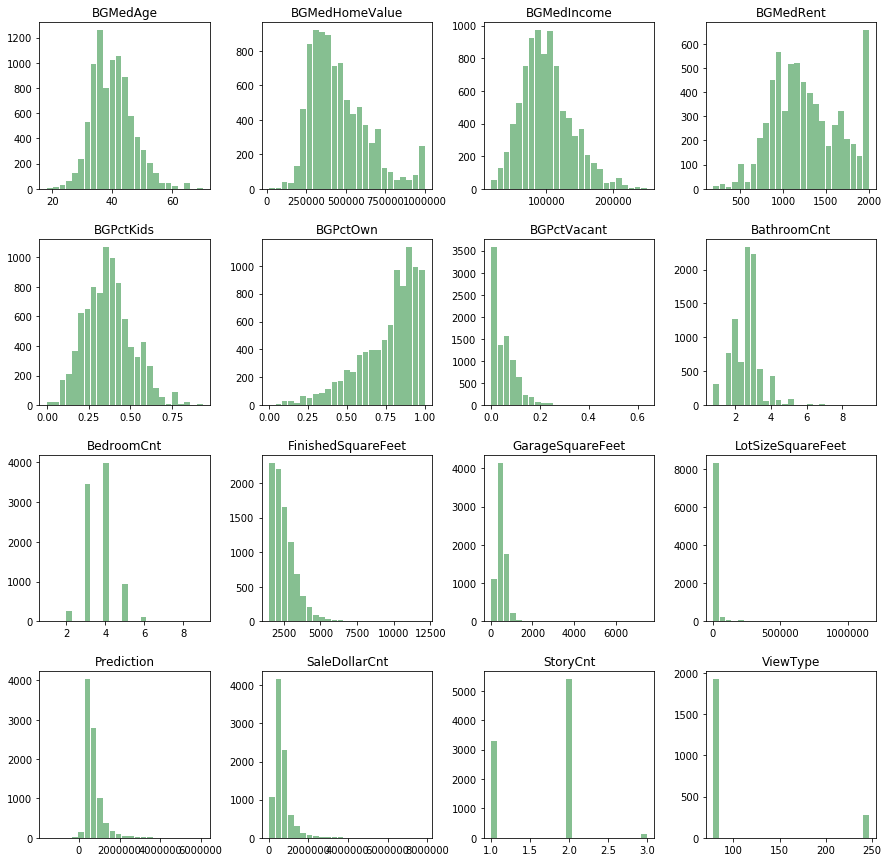

In [105]:
features = ['SaleDollarCnt', 'BedroomCnt', 'BathroomCnt', 'FinishedSquareFeet', 'GarageSquareFeet', 'LotSizeSquareFeet',
            'StoryCnt', 'ViewType', 'BGMedHomeValue', 'BGMedRent', 'BGPctOwn','BGPctVacant', 'BGMedIncome', 'BGPctKids', 'BGMedAge', 'Prediction']

prediction[features].hist(bins=25, grid=False, figsize=(15,15), color='#86bf91', zorder=2, rwidth=0.9)
plt.show()

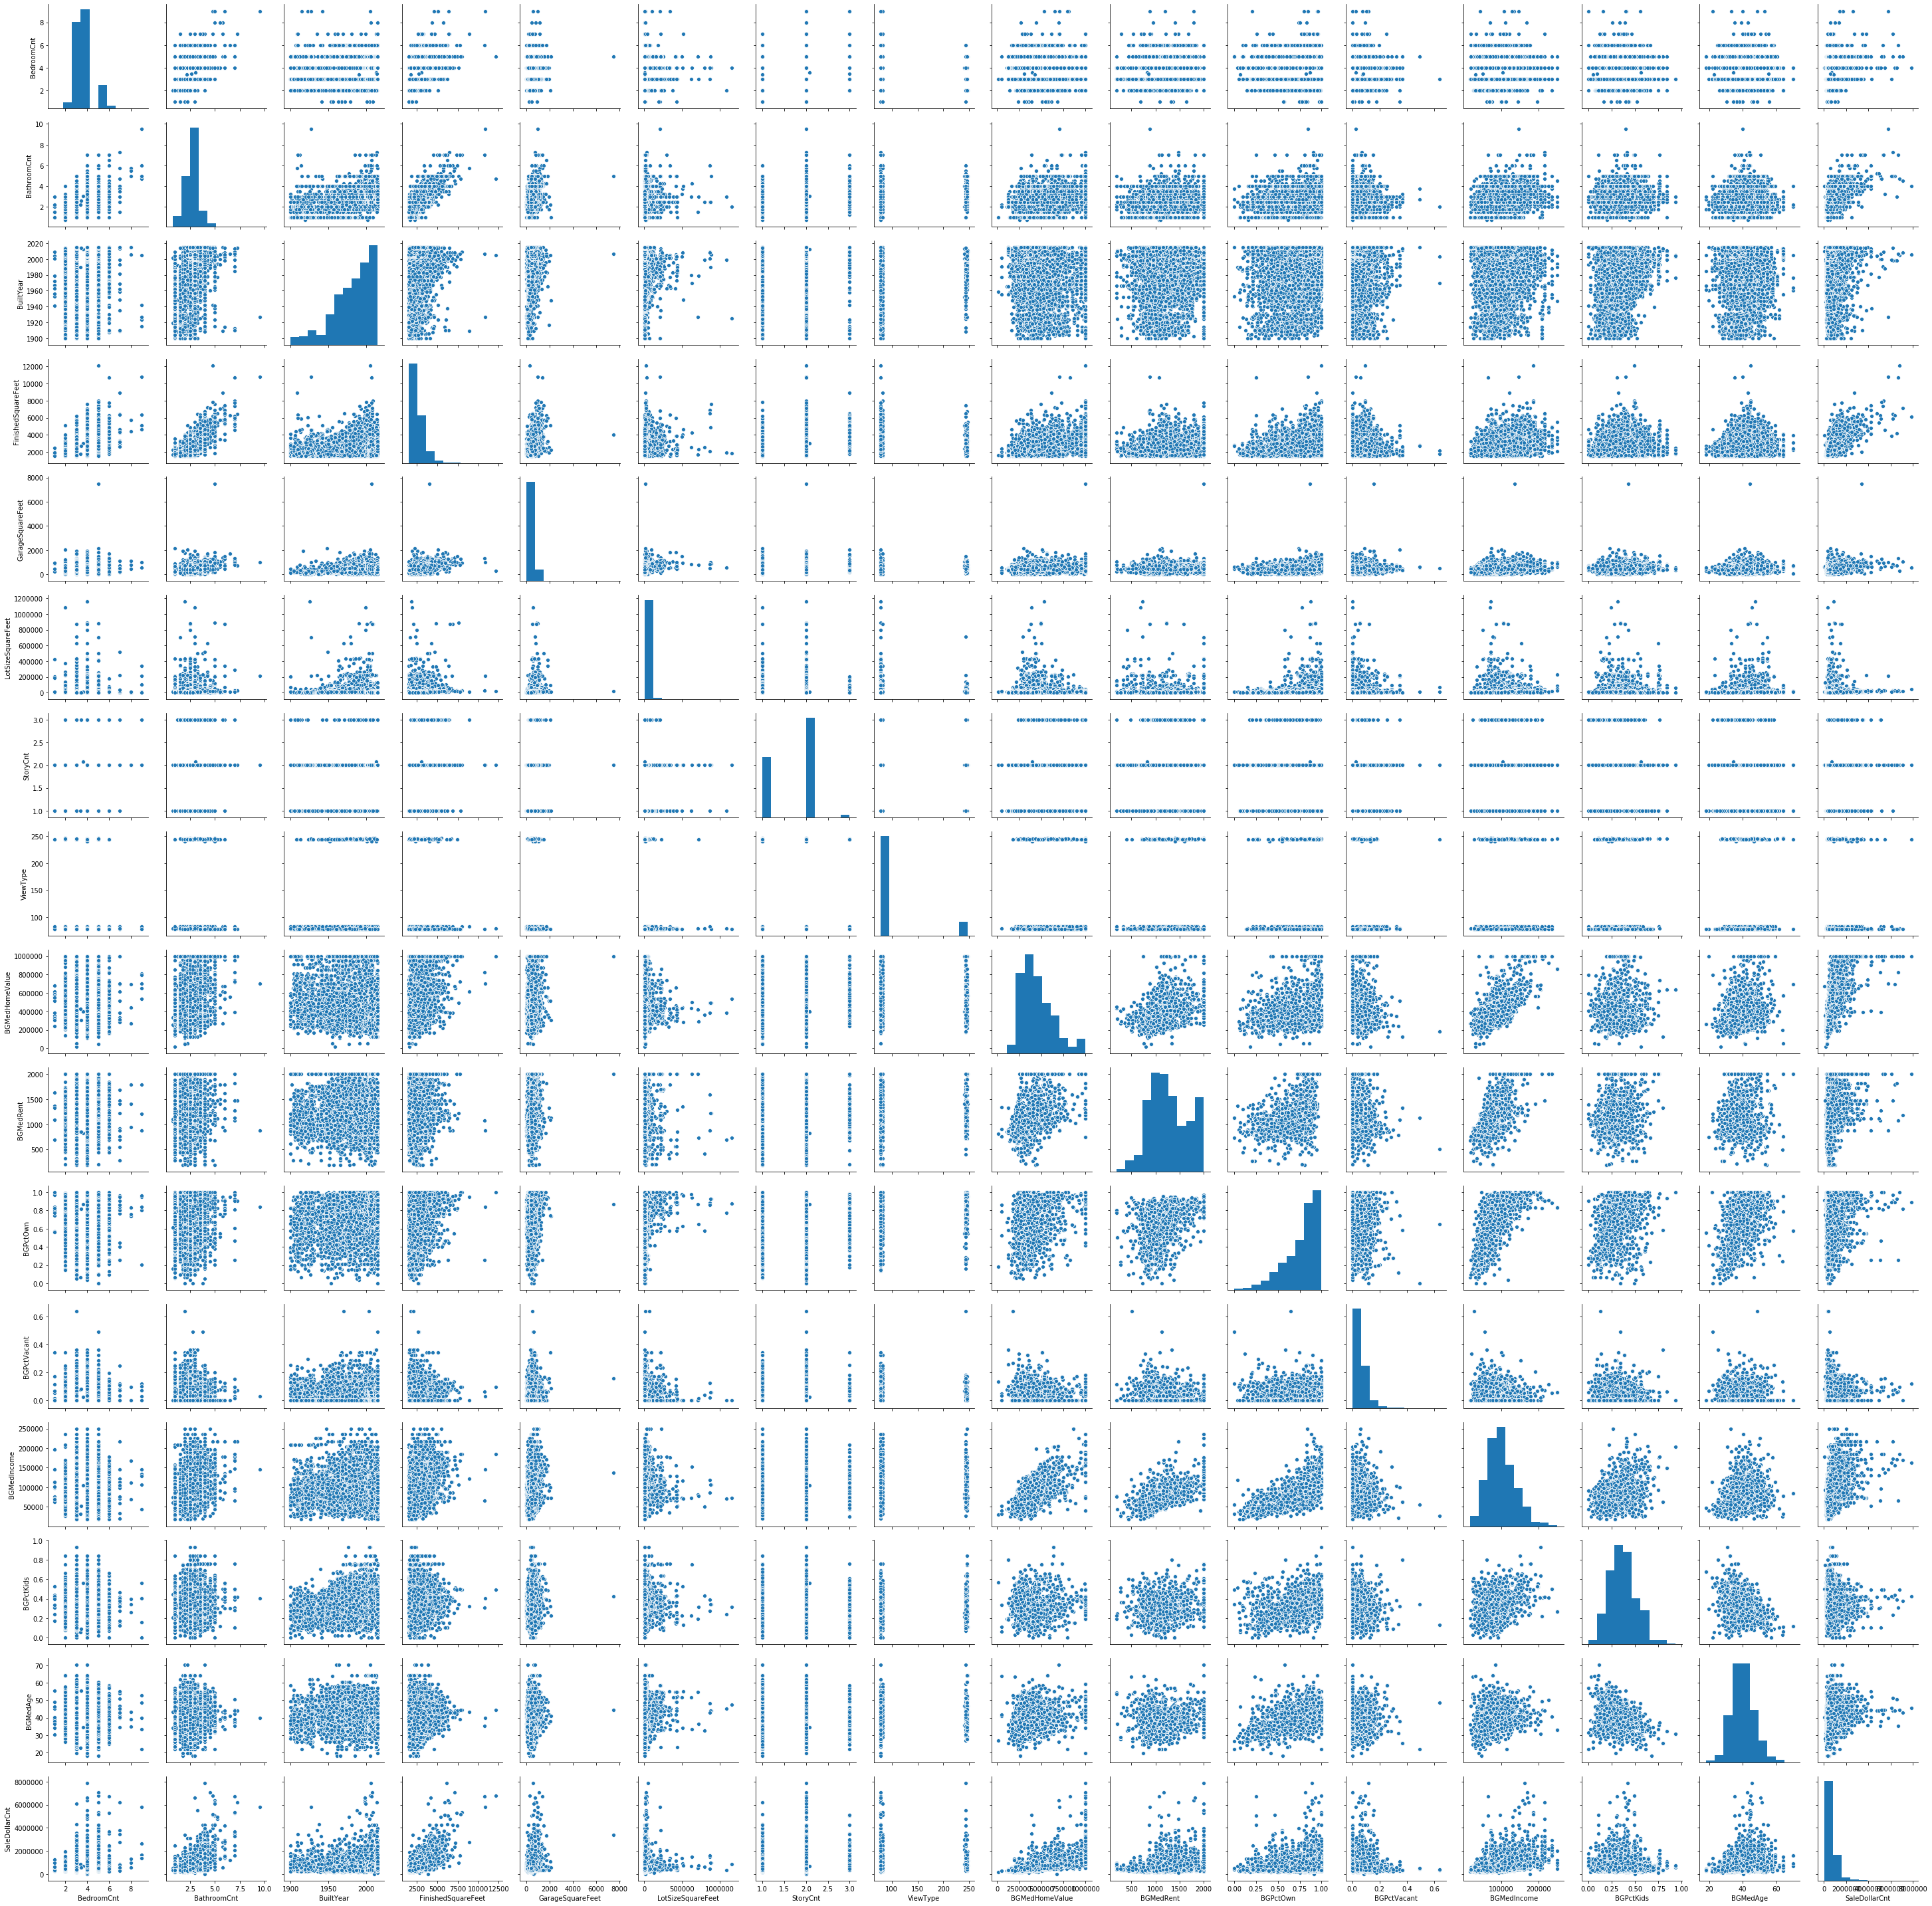

In [111]:
features = ['BedroomCnt', 'BathroomCnt', 'BuiltYear', 'FinishedSquareFeet', 'GarageSquareFeet', 'LotSizeSquareFeet',
            'StoryCnt', 'ViewType', 'BGMedHomeValue', 'BGMedRent', 'BGPctOwn','BGPctVacant', 'BGMedIncome', 'BGPctKids', 'BGMedAge', 'SaleDollarCnt']

# plt.figure(figsize=(15,15))
# for i in range(1, 13):
#     plt.subplot(3, 4, i)
#     sns.scatterplot(prediction[features[i-1]], prediction.Prediction,)

sns.pairplot(prediction[features])
plt.show()

## Regression assumptions

### Linearity & Equal variance

Both can be tested by two plots: predicted vs actual, residuals vs. predictions, where residuals are prediction errors.

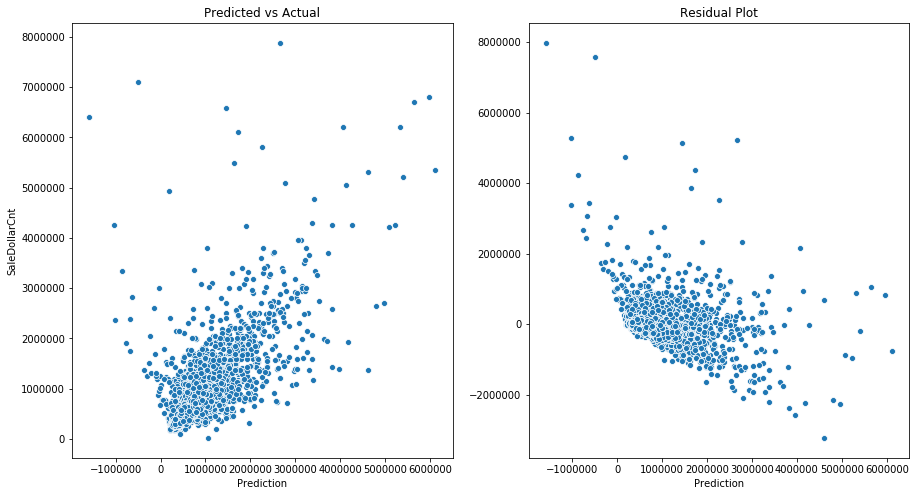

In [112]:
f, axs = plt.subplots(1,2, figsize=(15,8))
ax = sns.scatterplot(prediction.Prediction, prediction.SaleDollarCnt, ax = axs[0])
ax.set_title('Predicted vs Actual')
ax = sns.scatterplot(prediction.Prediction, residual, ax = axs[1])
ax.set_title('Residual Plot')
plt.show()

In this case, we see that both linearity and homoscedasticity are not met. Possible data transformation such as log, Box-Cox power transformation, and other interaction terms may be needed to get a better regression outcome.

### Normality
We can apply normal probability plot to assess how the data (error) depart from normality visually:

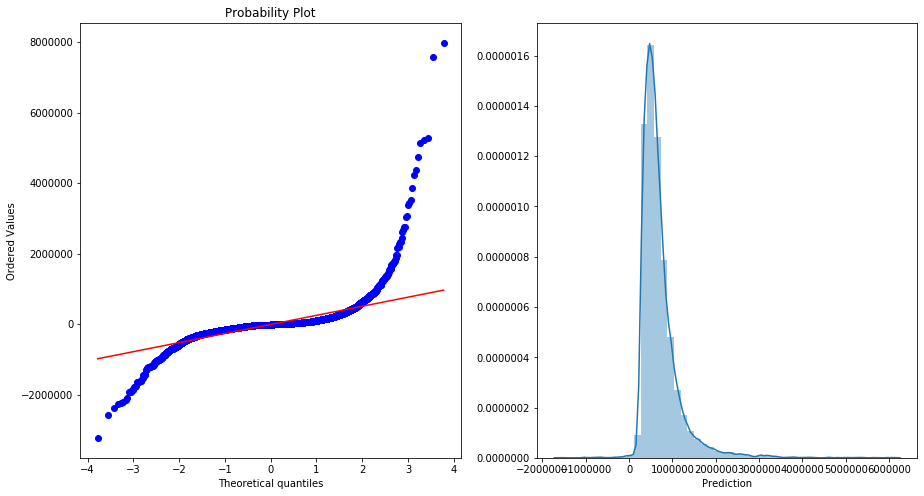

square root of the coefficient of determination: 0.575274190156864


In [117]:
import scipy as sp
fig, ax = plt.subplots(1,2, figsize=(15, 8))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax[0], fit=True)
sns.distplot(prediction.Prediction, ax=ax[1])
plt.show()

print('square root of the coefficient of determination:', r**2)

From the Q-Q plot and least-squares fit, it shows the data (error) does not follow normal distribution.